In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.stattools import adfuller
from sktime.forecasting.arima import ARIMA, AutoARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sktime.performance_metrics.forecasting import MeanSquaredError, MeanAbsolutePercentageError, MeanAbsoluteScaledError, MeanSquaredScaledError
from math import sqrt, ceil, floor

In [2]:
# import dataset from csv file
train = pd.read_csv('../Data/train.csv')
test = pd.read_csv('../Data/test.csv')

# Entrenamiento de los modelos

In [3]:
# create empty dataframe with idSku, d_coef, p_value
df_stationarity = pd.DataFrame(columns=['idSku', 'd_coef', 'p_value']) 

In [ ]:
# list distinct values of idSku
skus = train['idSku'].unique()
for s in skus:
    train_s = train[train['idSku'] == s]
    serie = train_s['udsVenta']
    results = adfuller(serie)
    p_value = results[1]
    d = 0
    while p_value > 0.05:
        serie = serie.diff().dropna()
        results = adfuller(serie)
        p_value = results[1]
        d += 1
    df_stationarity = df_stationarity.append({'idSku': s, 'd_coef': d, 'p_value': p_value}, ignore_index=True)
    

In [5]:
# d_coef to int
df_stationarity['d_coef'] = df_stationarity['d_coef'].astype(int)
df_stationarity.head(50)

,idSku,d_coef,p_value
0,1.0,0,1.848155e-03
1,2.0,0,3.344304e-02
2,3.0,0,4.304247e-03
3,4.0,0,7.736144e-03
4,5.0,0,1.187891e-02
5,6.0,0,3.556448e-04
6,7.0,1,2.317967e-16
7,8.0,0,2.011764e-02
8,9.0,0,5.281155e-03
9,10.0,0,3.962534e-04


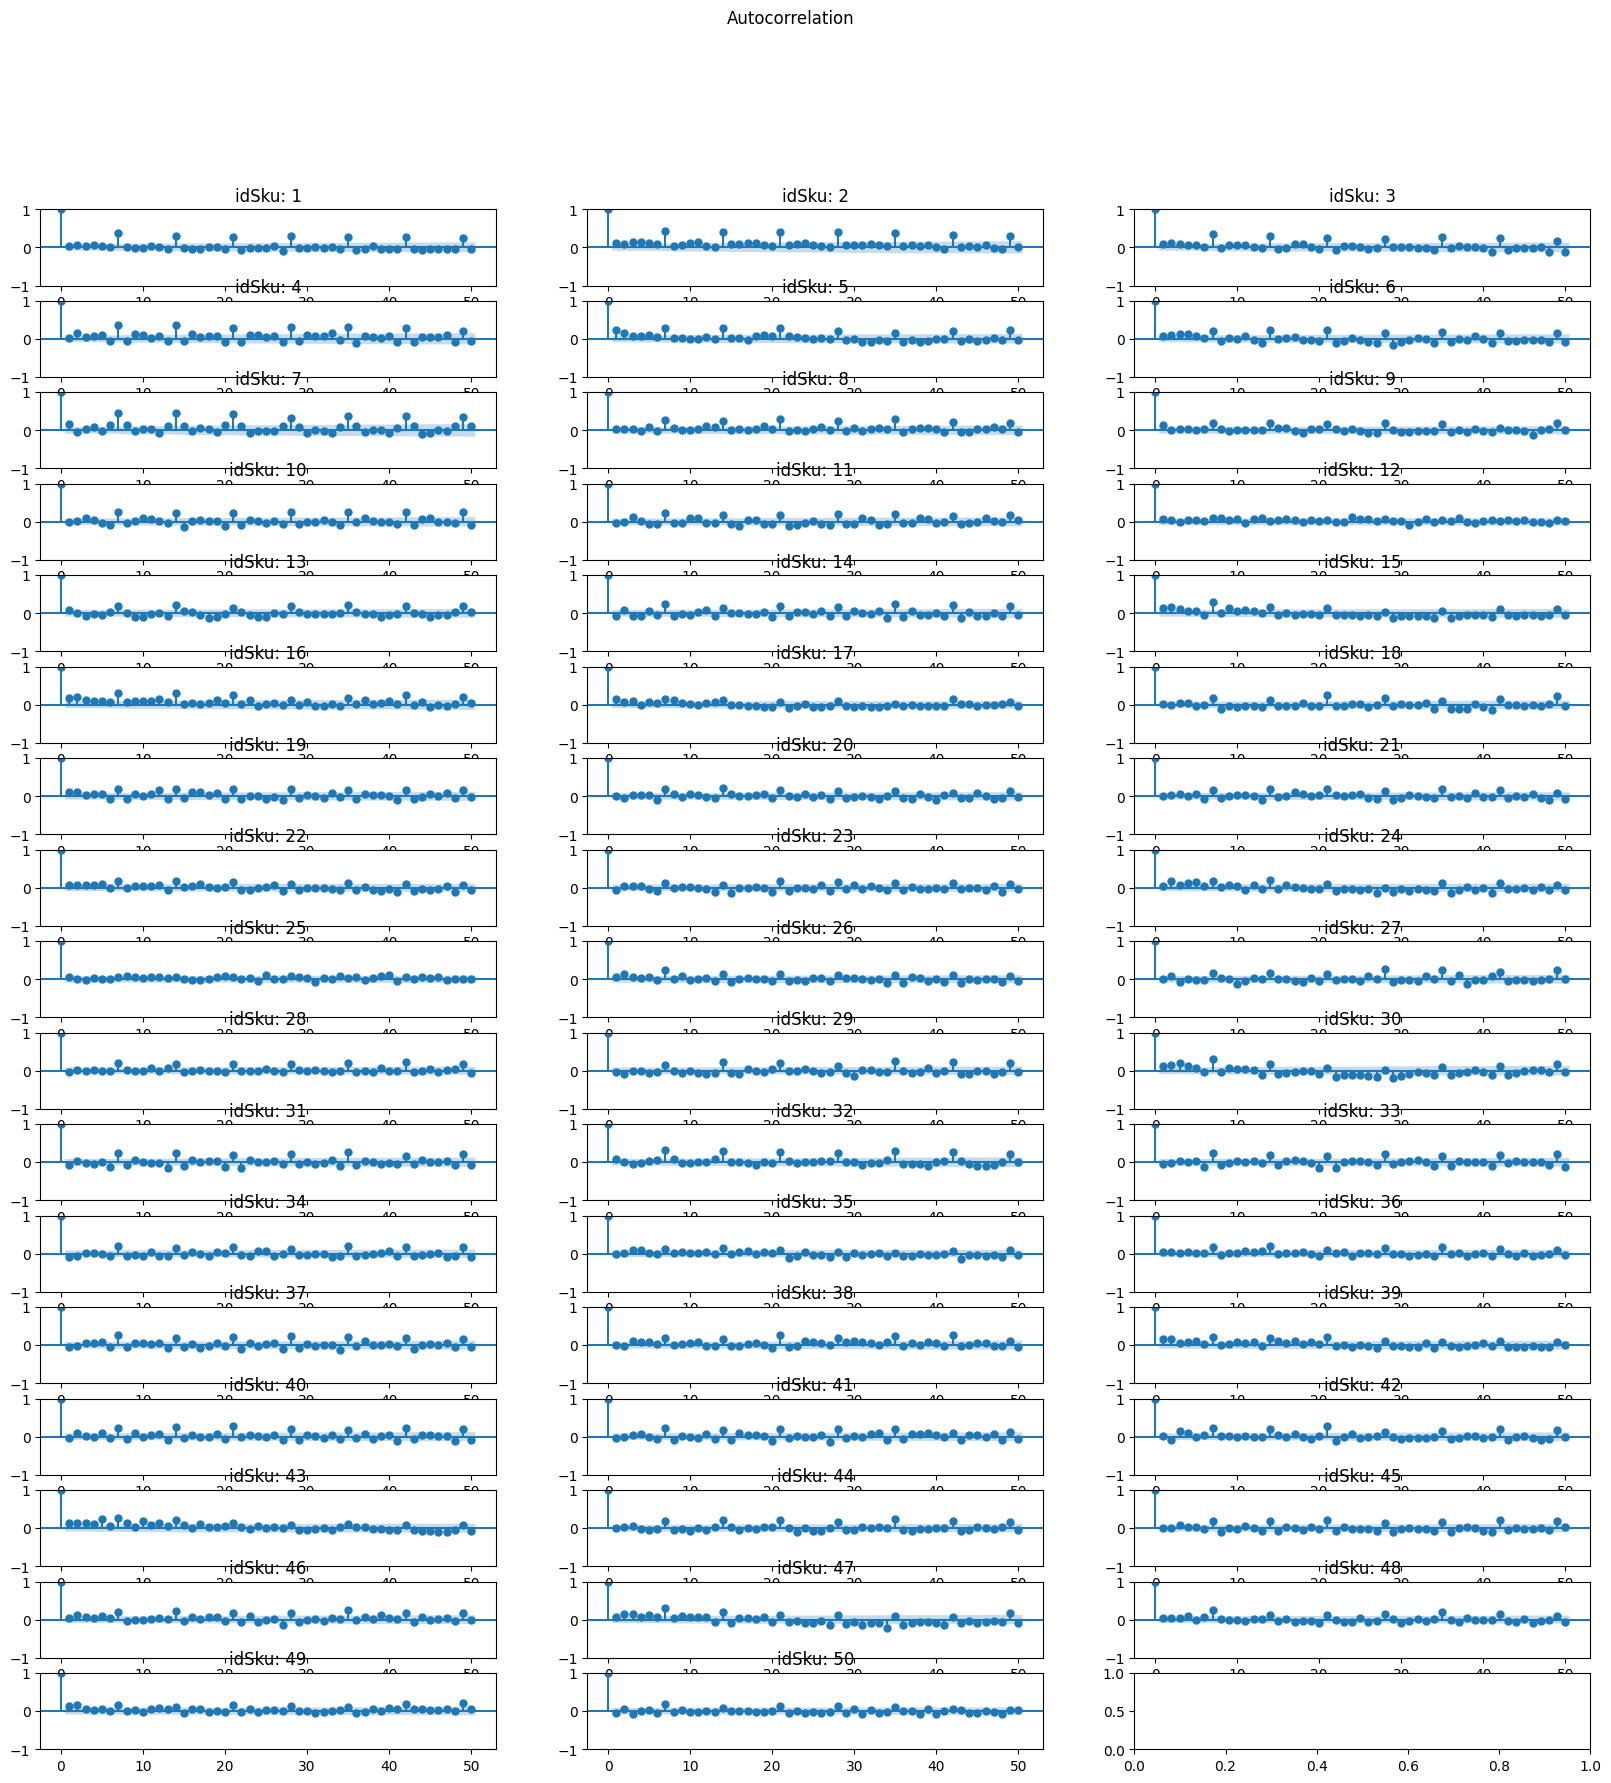

In [6]:
# make 50 subplots in a 17x3 grid and plot acf for each idSku
fig, axes = plt.subplots(17, 3, figsize=(20, 20))
fig.suptitle('Autocorrelation')
for i, s in enumerate(skus):
    train_s = train[train['idSku'] == s]
    train_s = train_s[['idSecuencia', 'udsVenta']]
    plot_acf(train_s['udsVenta'], ax=axes[i // 3, i % 3], lags=50)
    axes[i // 3, i % 3].set_title('idSku: ' + str(s))
plt.show()

c:\Users\96gar\anaconda3\envs\TFM_prediccion_promocional_env\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(
c:\Users\96gar\anaconda3\envs\TFM_prediccion_promocional_env\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(
c:\Users\96gar\anaconda3\envs\TFM_prediccion_promocional_env\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use th

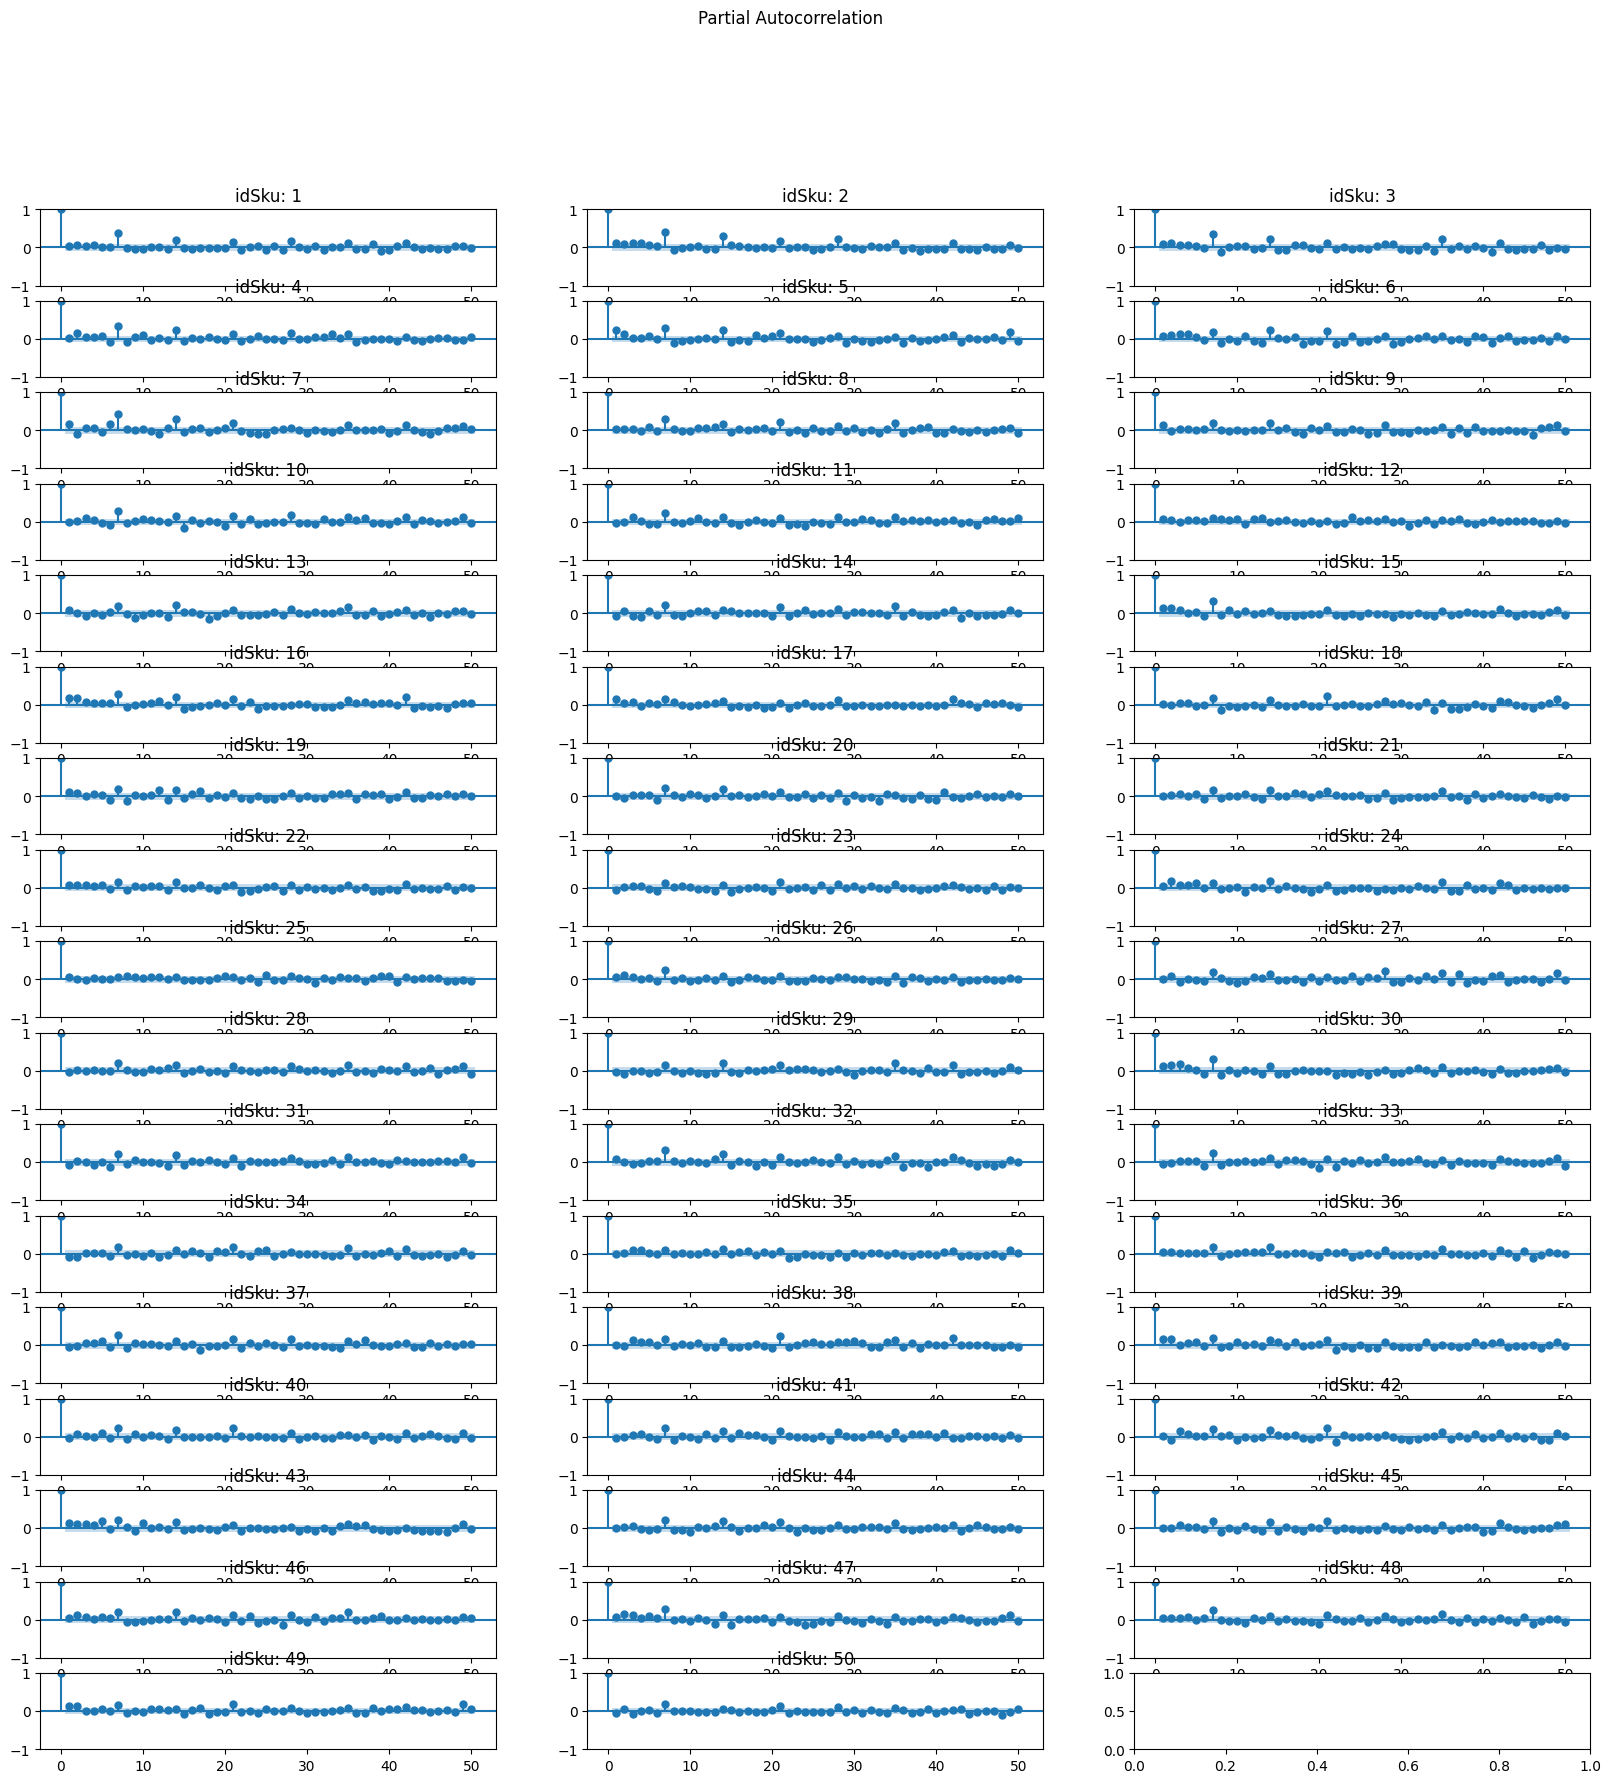

In [7]:
# make 50 subplots in a 17x3 grid and plot acf for each idSku
fig, axes = plt.subplots(17, 3, figsize=(20, 20))
fig.suptitle('Partial Autocorrelation')
for i, s in enumerate(skus):
    train_s = train[train['idSku'] == s]
    train_s = train_s[['idSecuencia', 'udsVenta']]
    plot_pacf(train_s['udsVenta'], ax=axes[i // 3, i % 3], lags=50)
    axes[i // 3, i % 3].set_title('idSku: ' + str(s))
plt.show()

In [8]:
start_p, max_p = 0, 5
start_q, max_q = 0, 5
start_P, max_P = 0, 5
start_Q, max_Q = 0, 5

In [9]:
# create an empty dataframe with idSku, order, seasonal_order
df_auto_arima = pd.DataFrame(columns=['idSku', 'order', 'seasonal_order'])

In [ ]:
for s in skus:
    train_s = train[train['idSku'] == s]
    d_coef = df_stationarity[df_stationarity['idSku'] == s]['d_coef'].values[0]
    train_s = train_s[['idSecuencia', 'udsVenta']]
    auto_arima = AutoARIMA(sp=7, d=d_coef, D=d_coef, start_p=start_p, max_p=max_p, start_q=start_q, max_q=max_q, start_P=start_P, max_P=max_P, start_Q=start_Q, max_Q=max_Q, suppress_warnings=True)
    auto_arima.fit(train_s['udsVenta'])
    order = auto_arima.get_fitted_params()['order']
    seasonal_order = auto_arima.get_fitted_params()['seasonal_order']
    df_auto_arima = df_auto_arima.append({'idSku': s, 'order': order, 'seasonal_order': seasonal_order}, ignore_index=True)


In [11]:
df_auto_arima.head(50)

,idSku,order,seasonal_order
0,1,"(2, 0, 0)","(5, 0, 0, 7)"
1,2,"(1, 0, 0)","(5, 0, 0, 7)"
2,3,"(2, 0, 2)","(5, 0, 1, 7)"
3,4,"(2, 0, 0)","(1, 0, 1, 7)"
4,5,"(3, 0, 0)","(1, 0, 1, 7)"
5,6,"(5, 0, 0)","(4, 0, 1, 7)"
6,7,"(0, 1, 1)","(0, 1, 1, 7)"
7,8,"(0, 0, 0)","(5, 0, 1, 7)"
8,9,"(0, 0, 1)","(4, 0, 1, 7)"
9,10,"(0, 0, 1)","(1, 0, 1, 7)"


In [12]:
df_auto_arima.to_csv('../Data/ARIMA_best_models.csv', index=False)